In [ ]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('C:\\Users\\ejane\\Downloads\\food_waste_analysis\\data\\global_food_wastage_dataset.csv')

# Quick Look
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [4]:
# Remove spaces and parentheses, convert to lowercase
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('[^a-zA-Z0-9_]', '', regex=True)
    .str.lower()
)

df.columns


Index(['country', 'year', 'food_category', 'total_waste_tons',
       'economic_loss_million_', 'avg_waste_per_capita_kg',
       'population_million', 'household_waste_'],
      dtype='object')

In [9]:
# Count missing values in each column
count = df.isnull().sum()

# Drop rows with any missing values (or handle them individually)
df = df.dropna()

count


country                    0
year                       0
food_category              0
total_waste_tons           0
economic_loss_million_     0
avg_waste_per_capita_kg    0
population_million         0
household_waste_           0
dtype: int64

In [ ]:
# Ensure 'year' is integer
df['year'] = df['year'].astype(int)

# Check data types
df.dtypes


country                     object
year                         int64
food_category               object
total_waste_tons           float64
economic_loss_million_     float64
avg_waste_per_capita_kg    float64
population_million         float64
household_waste_           float64
dtype: object

In [13]:
# Convert total waste is in tons to kg
df['waste_kg_per_person'] = (df['total_waste_tons'] * 1000) / (df['population_million'] * 1_000_000)

# Economic loss per person
df['loss_usd_per_person'] = (df['economic_loss_million_'] * 1_000_000) / (df['population_million'] * 1_000_000)


In [14]:
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  5000 non-null   object 
 1   year                     5000 non-null   int64  
 2   food_category            5000 non-null   object 
 3   total_waste_tons         5000 non-null   float64
 4   economic_loss_million_   5000 non-null   float64
 5   avg_waste_per_capita_kg  5000 non-null   float64
 6   population_million       5000 non-null   float64
 7   household_waste_         5000 non-null   float64
 8   waste_kg_per_person      5000 non-null   float64
 9   loss_usd_per_person      5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
# Top 10 total waste by country
df.groupby('çountry')['total_waste_tons'].sum().sort_values(ascending=False).head(10) 

C:\Users\ejane\AppData\Local\Temp\ipykernel_18316\1231202174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


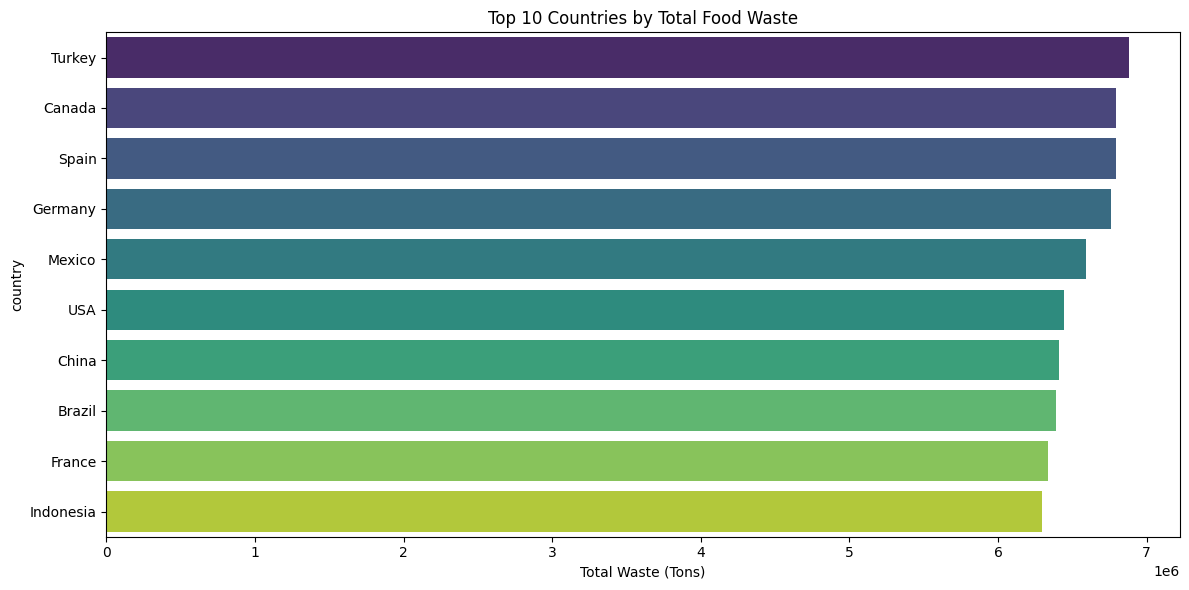

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.groupby('country')['total_waste_tons'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Waste (Tons)')
plt.title('Top 10 Countries by Total Food Waste')
plt.tight_layout()
plt.show()

C:\Users\ejane\AppData\Local\Temp\ipykernel_18316\4179663171.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='total_waste_tons', y='food_category', estimator='sum', ci=None)


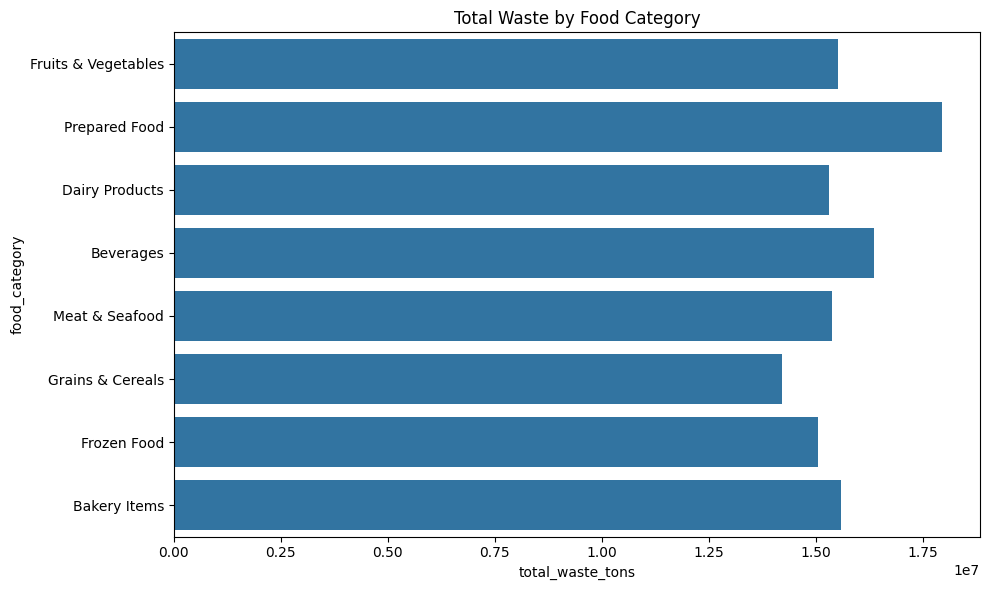

In [25]:
# Total Waste by Food Category
df.groupby('food_category')['total_waste_tons'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='total_waste_tons', y='food_category', estimator='sum', ci=None)
plt.title('Total Waste by Food Category')
plt.tight_layout()
plt.show()


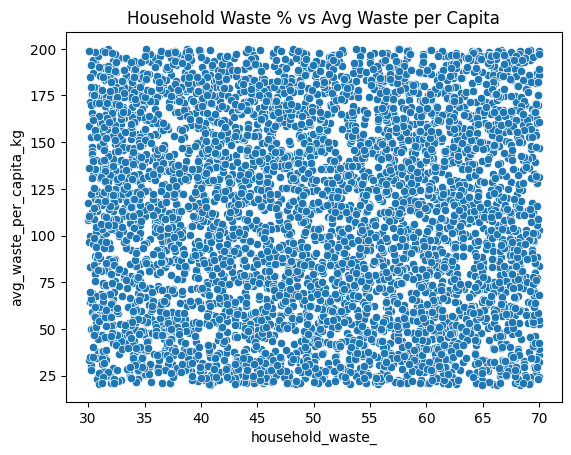

In [29]:
# Household Waste vs Avg waste per capita (correlation)
df[['household_waste_', 'avg_waste_per_capita_kg']].corr()
sns.scatterplot(data=df, x='household_waste_', y='avg_waste_per_capita_kg')
plt.title('Household Waste % vs Avg Waste per Capita')
plt.show()


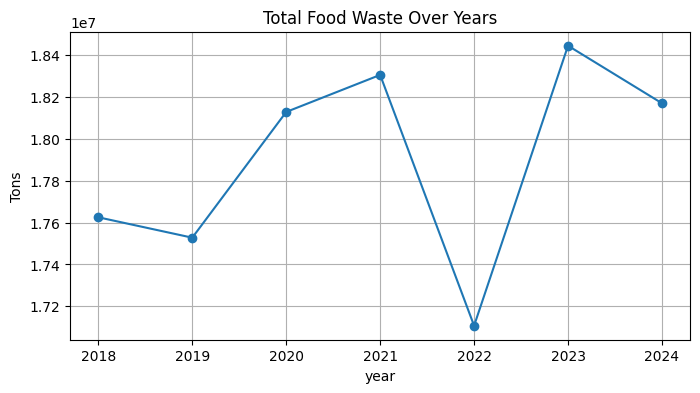

In [30]:
# Trend Analysis Waste over Time
df.groupby('year')['total_waste_tons'].sum().plot(kind='line', marker='o', figsize=(8,4))
plt.title('Total Food Waste Over Years')
plt.ylabel('Tons')
plt.grid(True)
plt.show()


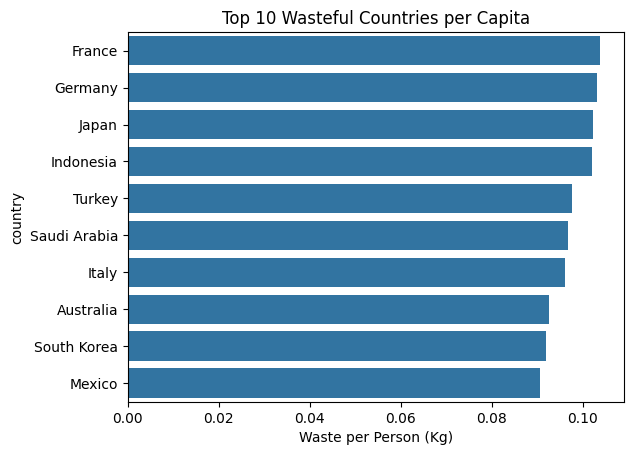

In [31]:
# More wasteful countries per capita
df.groupby('country')['waste_kg_per_person'].mean().sort_values(ascending=False).head(10)
top_per_capita = df.groupby('country')['waste_kg_per_person'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_per_capita.values, y=top_per_capita.index)
plt.xlabel('Waste per Person (Kg)')
plt.title('Top 10 Wasteful Countries per Capita')
plt.show()


In [33]:
# Economic Loss
df.groupby('country')['economic_loss_million_'].sum().sort_values(ascending=False).head(10)
df.groupby('food_category')['loss_usd_per_person'].mean().sort_values(ascending=False)



food_category
Fruits & Vegetables    103.814934
Prepared Food           95.971073
Bakery Items            86.581085
Dairy Products          85.188164
Beverages               84.986019
Grains & Cereals        84.358147
Meat & Seafood          84.234067
Frozen Food             68.099722
Name: loss_usd_per_person, dtype: float64

In [59]:
# Set threshold at top 25% for household waste
threshold = df['household_waste_'].quantile(0.75)

df['awareness_flag'] = df['household_waste_'].apply(
    lambda x: 'Campaign Needed' if x > threshold else 'No Action'
)
df[df['awareness_flag'] == 'Campaign Needed']
df['awareness_flag'].value_counts()


waste_threshold = df['waste_kg_per_person'].quantile(0.75)
loss_threshold = df['loss_usd_per_person'].quantile(0.75)

df['donation_redirect'] = df.apply(
    lambda row: 'Suggest Donation' if row['waste_kg_per_person'] > waste_threshold and row['loss_usd_per_person'] > loss_threshold else 'Not Critical',
    axis=1
)




In [60]:
df[['country', 'food_category', 'waste_kg_per_person', 'loss_usd_per_person',
    'price_action', 'awareness_flag', 'donation_redirect']].head(10)


,country,food_category,waste_kg_per_person,loss_usd_per_person,price_action,awareness_flag,donation_redirect
0,Australia,Fruits & Vegetables,0.219987,213.342619,Stable,No Action,Suggest Donation
1,Indonesia,Prepared Food,0.003394,3.808075,Reduce Price,No Action,Not Critical
2,Germany,Dairy Products,0.009641,8.855056,Reduce Price,No Action,Not Critical
3,France,Fruits & Vegetables,0.048581,42.548890,Stable,No Action,Not Critical
4,France,Beverages,0.029939,33.452577,Stable,No Action,Not Critical
5,India,Fruits & Vegetables,0.009119,8.534152,Stable,No Action,Not Critical
6,Germany,Prepared Food,0.033376,29.042388,Reduce Price,Campaign Needed,Not Critical
7,China,Fruits & Vegetables,0.010405,9.951500,Stable,No Action,Not Critical
8,UK,Meat & Seafood,0.032855,31.858792,Stable,No Action,Not Critical
9,India,Grains & Cereals,0.033731,37.942354,Stable,No Action,Not Critical


In [61]:
# See only rows where awareness campaign is needed
df[df['awareness_flag'] == 'Campaign Needed']

# See where donation is suggested
df[df['donation_redirect'] == 'Suggest Donation']


,country,year,food_category,total_waste_tons,economic_loss_million_,avg_waste_per_capita_kg,population_million,household_waste_,waste_kg_per_person,loss_usd_per_person,price_action,awareness_flag,donation_redirect
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,0.219987,213.342619,Stable,No Action,Suggest Donation
10,South Africa,2024,Frozen Food,39478.70,40087.26,155.55,375.84,31.16,0.105041,106.660441,Reduce Price,No Action,Suggest Donation
17,Saudi Arabia,2020,Prepared Food,18483.82,21071.65,198.62,143.12,48.83,0.129149,147.230646,Reduce Price,No Action,Suggest Donation
18,UK,2022,Meat & Seafood,25829.56,20806.34,119.62,185.01,32.51,0.139612,112.460624,Stable,No Action,Suggest Donation
20,Saudi Arabia,2019,Fruits & Vegetables,10653.37,8992.33,74.16,37.76,46.44,0.282134,238.144333,Stable,No Action,Suggest Donation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,South Africa,2018,Fruits & Vegetables,46466.94,46343.29,182.33,640.21,69.91,0.072581,72.387638,Reduce Price,Campaign Needed,Suggest Donation
4985,USA,2023,Dairy Products,9821.36,8333.60,50.23,60.53,66.21,0.162256,137.677185,Stable,Campaign Needed,Suggest Donation
4987,Germany,2019,Dairy Products,18154.90,16980.32,105.00,23.82,62.94,0.762170,712.859782,Stable,Campaign Needed,Suggest Donation
4994,Indonesia,2023,Prepared Food,39980.40,37618.45,32.34,27.08,56.38,1.476381,1389.159897,Stable,No Action,Suggest Donation


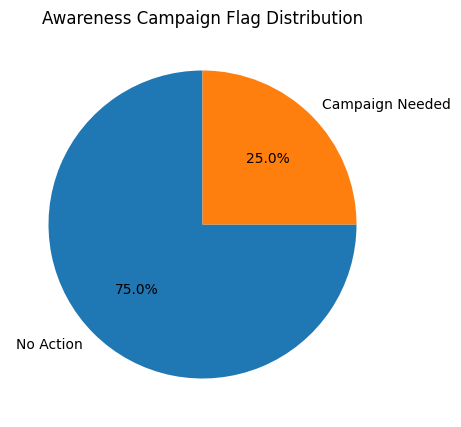

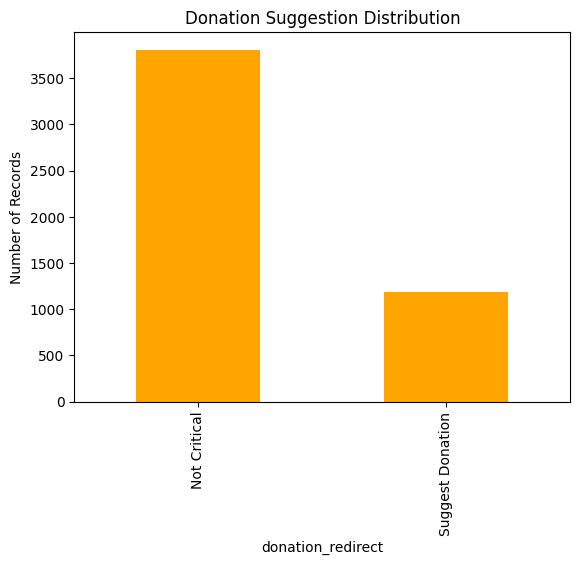

In [62]:
# Awareness
df['awareness_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5,5))
plt.title('Awareness Campaign Flag Distribution')
plt.ylabel('')
plt.show()

# Donation
df['donation_redirect'].value_counts().plot(kind='bar', color='orange')
plt.title('Donation Suggestion Distribution')
plt.ylabel('Number of Records')
plt.show()


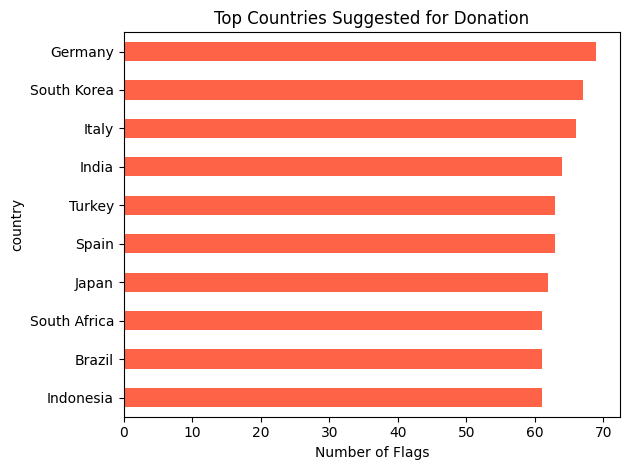

In [63]:
top_donation = df[df['donation_redirect'] == 'Suggest Donation']
donation_by_country = top_donation['country'].value_counts().head(10)

donation_by_country.plot(kind='barh', color='tomato')
plt.title('Top Countries Suggested for Donation')
plt.xlabel('Number of Flags')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\ejane\AppData\Local\Temp\ipykernel_18316\1215705787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_score', data=df, palette='coolwarm')


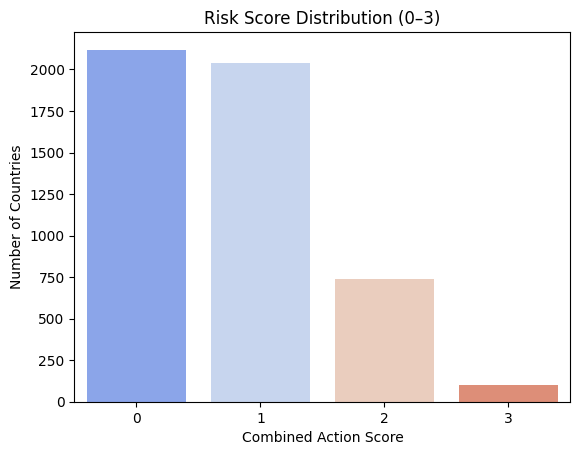

In [65]:
def risk(row):
    score = 0
    if row['awareness_flag'] == 'Campaign Needed':
        score += 1
    if row['donation_redirect'] == 'Suggest Donation':
        score += 1
    if row['price_action'] == 'Reduce Price':
        score += 1
    return score

df['risk_score'] = df.apply(risk, axis=1)
sns.countplot(x='risk_score', data=df, palette='coolwarm')
plt.title('Risk Score Distribution (0–3)')
plt.xlabel('Combined Action Score')
plt.ylabel('Number of Countries')
plt.show()



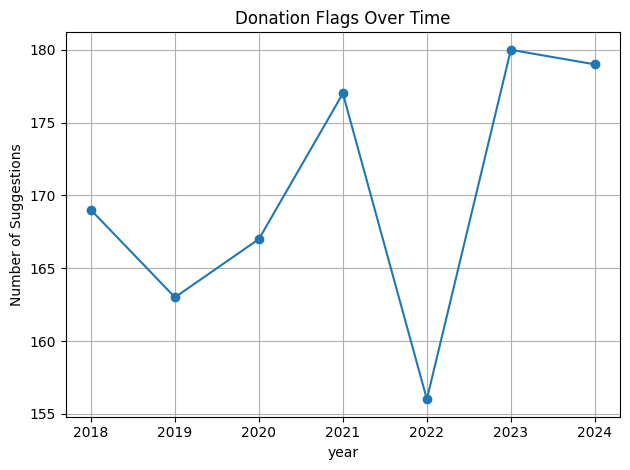

In [66]:
df.groupby('year')['donation_redirect'].apply(lambda x: (x == 'Suggest Donation').sum()).plot(marker='o')
plt.title('Donation Flags Over Time')
plt.ylabel('Number of Suggestions')
plt.grid(True)
plt.tight_layout()
plt.show()
